# BOW_COUNTVEC_TF-IDF_PIPELINE

## EDA

In [1]:
import pandas as pd
data = 'TripleA.csv'
df = pd.read_csv(data)
print(df.columns)
print(df["Sentiment"].value_counts())


Index(['Review', 'Sentiment'], dtype='object')
Sentiment
Negative    533
Neutral     263
Positive    198
Name: count, dtype: int64


In [2]:
valid_sentiments = {"Positive", "Neutral", "Negative"}
unique_sentiments = set(df["Sentiment"].unique())

# Find invalid sentiment labels
invalid_sentiments = unique_sentiments - valid_sentiments

if invalid_sentiments:
    print("Unexpected sentiment labels found:", invalid_sentiments)
    invalid_rows = df[df["Sentiment"].isin(invalid_sentiments)]
    print(invalid_rows)
else:
    print("All sentiments are correctly labeled.")

All sentiments are correctly labeled.


In [3]:
df.describe()

,Review,Sentiment
count,994,994
unique,988,3
top,They are wonderful when they worksB,Negative
freq,2,533


In [4]:
print(df.duplicated(subset="Review").sum())

6


In [5]:
df.groupby('Sentiment').describe()

Review                                                            \
           count unique                                                top   
Sentiment                                                                    
Negative     533    530  Air Asia is the most incompetent airlines Ive ...   
Neutral      263    263  Thieving bass still owe me a 1000 usd I will n...   
Positive     198    198  Ive flown with them dozens of times and never ...   

                
          freq  
Sentiment       
Negative     2  
Neutral      1  
Positive     1

In [6]:
df['length']=df['Review'].apply(len)
df.head()

,Review,Sentiment,length
0,Ive flown with them dozens of times and never ...,Positive,66
1,Ive flown AirAsia Thai AirAsia and AirAsia Phi...,Positive,77
2,I have flown with them several times and never...,Positive,155
3,Within Thailand I have good experiences with t...,Negative,164
4,Same experience with AirAsia Japan,Negative,34


## Data Visualisation

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: ylabel='Frequency'>

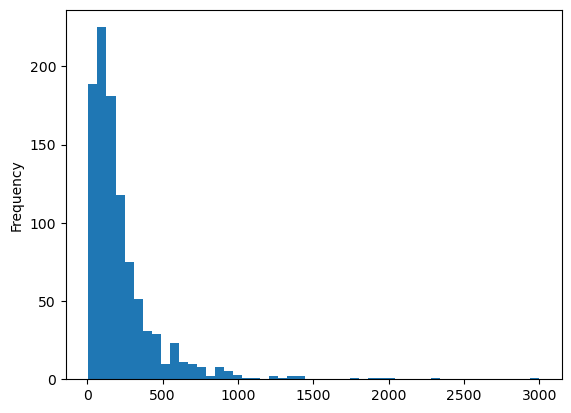

In [8]:
df['length'].plot(bins=50, kind='hist') 

In [9]:
df.length.describe()

count     994.000000
mean      225.484909
std       258.856635
min         8.000000
25%        80.000000
50%       153.000000
75%       268.750000
max      3000.000000
Name: length, dtype: float64

In [10]:
df[df['length'] == 3000]['Review'].iloc[0]

'Im a frequent AirAsia flyer People dont get how they keep things low cost Its like getting an Axia rahmah and complaining about how little you get for such a cheap price They dont give you food extra leg space or check in baggage just to keep costs low No other flight offers prices as low as theirs RM29 from KL to Langkawi RM19 from Kuching to KK RM160 to Bali If you want addons and you can afford it or fly other airlines good for you But for a budget traveler who wants to fly good for them Their taxi time is about 20 minutes meaning people get off once they land new passengers get on board and they go to their next destination They save costs because pilots cabin crew dont have to stay at the destination Because of the tight schedule if anything goes wrong its a domino effect for all their other flights It can range from a malfunction weather crews getting sick or exceeding legal work hours due to delays airport technical issues these will all affect the flights And its not even limi

array([[<Axes: title={'center': 'Negative'}>,
        <Axes: title={'center': 'Neutral'}>],
       [<Axes: title={'center': 'Positive'}>, <Axes: >]], dtype=object)

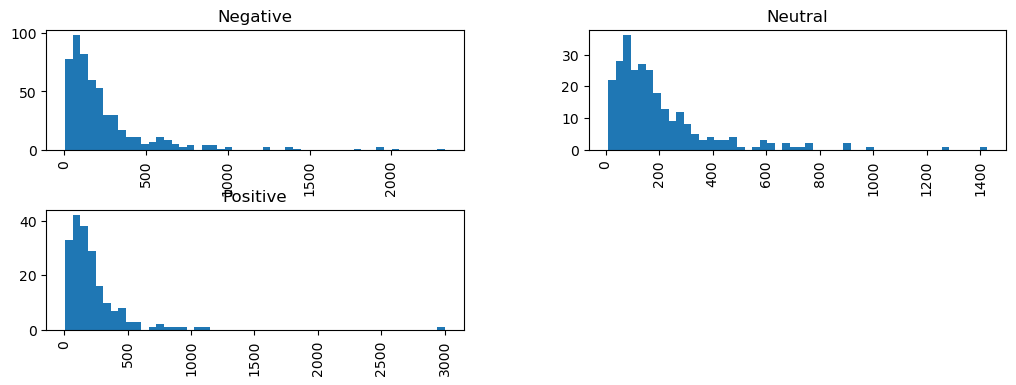

In [11]:
df.hist(column='length', by='Sentiment', bins=50,figsize=(12,4))

## Text Preprocessing

In [12]:
import nltk
from nltk.corpus import stopwords

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Athin
[nltk_data]     Suresh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stopwords.words('english')[0:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [15]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)
print(nopunc)

Sample message Notice it has punctuation


In [16]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [17]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [18]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [19]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [20]:
df.head()

,Review,Sentiment,length
0,Ive flown with them dozens of times and never ...,Positive,66
1,Ive flown AirAsia Thai AirAsia and AirAsia Phi...,Positive,77
2,I have flown with them several times and never...,Positive,155
3,Within Thailand I have good experiences with t...,Negative,164
4,Same experience with AirAsia Japan,Negative,34


In [21]:
df['Review'].head(5).apply(text_process)

0    [Ive, flown, dozens, times, never, major, issues]
1    [Ive, flown, AirAsia, Thai, AirAsia, AirAsia, ...
2    [flown, several, times, never, problems, weigh...
3    [Within, Thailand, good, experiences, flew, ai...
4                         [experience, AirAsia, Japan]
Name: Review, dtype: object

## Vectorisation

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Review'])
print(len(bow_transformer.vocabulary_))

4897


In [26]:
review4=df['Review'][3]
print(review4)

Within Thailand I have good experiences with them I flew air Asia x to Japan and it was really bad Cabin staff was honestly nice but ground staff was awful and rude


In [27]:
bow4 = bow_transformer.transform([review4])
print(bow4)
print(bow4.shape)

  (0, 282)	1
  (0, 375)	1
  (0, 670)	1
  (0, 1096)	1
  (0, 1190)	1
  (0, 1303)	1
  (0, 1470)	1
  (0, 1480)	1
  (0, 2372)	1
  (0, 2488)	1
  (0, 2627)	1
  (0, 2646)	1
  (0, 2751)	1
  (0, 3331)	1
  (0, 3769)	1
  (0, 3964)	1
  (0, 4257)	2
  (0, 4850)	1
(1, 4897)


In [28]:
reviews_bow = bow_transformer.transform(df['Review'])
print('Shape of Sparse Matrix: ', reviews_bow.shape)
print('Amount of Non-Zero occurences: ', reviews_bow.nnz)

Shape of Sparse Matrix:  (994, 4897)
Amount of Non-Zero occurences:  20605


## TF_IDF

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(reviews_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 4850)	0.29180137401287054
  (0, 4257)	0.36811768683643614
  (0, 3964)	0.24468637853069258
  (0, 3769)	0.17289636405650702
  (0, 3331)	0.2497376120277759
  (0, 2751)	0.23234886903468882
  (0, 2646)	0.22277915320273503
  (0, 2627)	0.1598939433027906
  (0, 2488)	0.16946365913474434
  (0, 2372)	0.220011359538685
  (0, 1480)	0.1678451305594237
  (0, 1470)	0.25546422825547216
  (0, 1303)	0.15795891205808238
  (0, 1190)	0.30919011700595767
  (0, 1096)	0.20444782463925193
  (0, 670)	0.23608043173069188
  (0, 375)	0.30919011700595767
  (0, 282)	0.11741978663520111


In [33]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['awful']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Asia']])

5.956832588103279
2.7379567632350787


In [34]:
reviews_tfidf = tfidf_transformer.transform(reviews_bow)
print(reviews_tfidf.shape)

(994, 4897)


## Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB
review_detect_model = MultinomialNB().fit(reviews_tfidf, df['Sentiment'])
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', df['Sentiment'][3])

predicted: Negative
expected: Negative


In [40]:
all_predictions = review_detect_model.predict(reviews_tfidf)
print(all_predictions)

['Positive' 'Negative' 'Positive' 'Negative' 'Negative' 'Negative'
 'Positive' 'Negative' 'Negative' 'Positive' 'Negative' 'Negative'
 'Positive' 'Negative' 'Negative' 'Positive' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Positive' 'Negative' 'Negative'
 'Neutral' 'Negative' 'Negative' 'Negative' 'Positive' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Neutral'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Negative' 'Negativ

**Model Evalution**

In [53]:
from sklearn.metrics import classification_report
print (classification_report(df['Sentiment'], all_predictions))

              precision    recall  f1-score   support

    Negative       0.60      1.00      0.75       533
     Neutral       0.96      0.21      0.34       263
    Positive       1.00      0.23      0.38       198

    accuracy                           0.64       994
   macro avg       0.85      0.48      0.49       994
weighted avg       0.78      0.64      0.57       994



## Trying KFOLD

In [50]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Define K-Fold (5 splits)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # Convert text to BoW
    ('tfidf', TfidfTransformer()),  # Convert BoW to TF-IDF
    ('classifier', MultinomialNB()),  # Train Naïve Bayes classifier
])

# Loop through each fold
fold_number = 1
for train_index, test_index in kf.split(df):
    rev_train, rev_test = df['Review'].iloc[train_index], df['Review'].iloc[test_index]
    sent_train, sent_test = df['Sentiment'].iloc[train_index], df['Sentiment'].iloc[test_index]

    # Train the pipeline on this fold
    pipeline.fit(rev_train, sent_train)

    # Predict on the test set of this fold
    predictions = pipeline.predict(rev_test)

    # Print classification report for this fold
    print(f"\n🔹 Fold {fold_number} Classification Report:\n")
    print(classification_report(sent_test, predictions))

    fold_number += 1  # Move to the next fold



🔹 Fold 1 Classification Report:

              precision    recall  f1-score   support

    Negative       0.57      1.00      0.73       113
     Neutral       0.00      0.00      0.00        50
    Positive       0.00      0.00      0.00        36

    accuracy                           0.57       199
   macro avg       0.19      0.33      0.24       199
weighted avg       0.32      0.57      0.41       199



C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 Fold 2 Classification Report:

              precision    recall  f1-score   support

    Negative       0.48      1.00      0.65        96
     Neutral       1.00      0.02      0.04        56
    Positive       0.00      0.00      0.00        47

    accuracy                           0.49       199
   macro avg       0.49      0.34      0.23       199
weighted avg       0.52      0.49      0.32       199



C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 Fold 3 Classification Report:

              precision    recall  f1-score   support

    Negative       0.55      1.00      0.71       109
     Neutral       0.00      0.00      0.00        53
    Positive       1.00      0.03      0.05        37

    accuracy                           0.55       199
   macro avg       0.52      0.34      0.26       199
weighted avg       0.49      0.55      0.40       199


🔹 Fold 4 Classification Report:

              precision    recall  f1-score   support

    Negative       0.57      1.00      0.73       113
     Neutral       0.00      0.00      0.00        44
    Positive       1.00      0.02      0.05        42

    accuracy                           0.57       199
   macro avg       0.52      0.34      0.26       199
weighted avg       0.54      0.57      0.42       199



C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 Fold 5 Classification Report:

              precision    recall  f1-score   support

    Negative       0.52      1.00      0.68       102
     Neutral       0.00      0.00      0.00        60
    Positive       1.00      0.03      0.05        36

    accuracy                           0.52       198
   macro avg       0.51      0.34      0.25       198
weighted avg       0.45      0.52      0.36       198



C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Stratified KFOLD

In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Use Stratified K-Fold to maintain class distribution
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # Convert text to BoW
    ('tfidf', TfidfTransformer()),  # Convert BoW to TF-IDF
    ('classifier', MultinomialNB()),  # Train Naïve Bayes classifier
])

# Loop through each fold
fold_number = 1
for train_index, test_index in kf.split(df['Review'], df['Sentiment']):  
    rev_train, rev_test = df['Review'].iloc[train_index], df['Review'].iloc[test_index]
    sent_train, sent_test = df['Sentiment'].iloc[train_index], df['Sentiment'].iloc[test_index]

    # Train the model
    pipeline.fit(rev_train, sent_train)

    # Make predictions
    predictions = pipeline.predict(rev_test)

    # Print classification report
    print(f"\n🔹 Fold {fold_number} Classification Report:\n")
    print(classification_report(sent_test, predictions))

    fold_number += 1



🔹 Fold 1 Classification Report:

              precision    recall  f1-score   support

    Negative       0.54      1.00      0.70       107
     Neutral       0.00      0.00      0.00        52
    Positive       1.00      0.05      0.10        40

    accuracy                           0.55       199
   macro avg       0.51      0.35      0.27       199
weighted avg       0.49      0.55      0.40       199



C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 Fold 2 Classification Report:

              precision    recall  f1-score   support

    Negative       0.54      1.00      0.70       106
     Neutral       0.00      0.00      0.00        53
    Positive       1.00      0.03      0.05        40

    accuracy                           0.54       199
   macro avg       0.51      0.34      0.25       199
weighted avg       0.49      0.54      0.38       199



C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 Fold 3 Classification Report:

              precision    recall  f1-score   support

    Negative       0.54      1.00      0.70       106
     Neutral       0.00      0.00      0.00        53
    Positive       0.00      0.00      0.00        40

    accuracy                           0.53       199
   macro avg       0.18      0.33      0.23       199
weighted avg       0.29      0.53      0.37       199



C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 Fold 4 Classification Report:

              precision    recall  f1-score   support

    Negative       0.54      1.00      0.70       107
     Neutral       0.00      0.00      0.00        53
    Positive       0.00      0.00      0.00        39

    accuracy                           0.54       199
   macro avg       0.18      0.33      0.23       199
weighted avg       0.29      0.54      0.38       199



C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



🔹 Fold 5 Classification Report:

              precision    recall  f1-score   support

    Negative       0.54      1.00      0.70       107
     Neutral       0.00      0.00      0.00        52
    Positive       1.00      0.03      0.05        39

    accuracy                           0.55       198
   macro avg       0.51      0.34      0.25       198
weighted avg       0.49      0.55      0.39       198



C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Athin Suresh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
